# Comparisons of Lempel-Ziv scores in LLMs generated creative writing tasks
Table of content
1. Load data (generated using [this](https://github.com/AntoineBellemare/DAT_GPT/blob/main/scripts/analyze_stories_dsi-lziv.py) script)
2. Overview
3. Plot models' performance across temperatures
### Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import glob

In [2]:
results_df = pd.read_csv("../ALL_DSI-lziv_output.csv", header=0, sep=",")
results_df['temp'].replace('n.a.', 'Mid', inplace=True)#

In [3]:
results_df.loc[(results_df['condition']=='synopsis') & (results_df['model']=='GPT4')]['temp'].unique()

array(['Very High', 'High', 'Low', 'Very Low', 'Mid'], dtype=object)

# 1. Overview
## Plot all distributions seprately to get an overview

Works: synopsis Mid
Works: synopsis Very High
Works: synopsis Very Low
Works: synopsis High
synopsis Mid-High
Works: synopsis Low
synopsis Mid-Low
Works: haiku Mid
Works: haiku Very High
Works: haiku Very Low
Works: haiku High
haiku Mid-High
Works: haiku Low
haiku Mid-Low
Works: flash-fiction Mid
flash-fiction Very High
flash-fiction Very Low
Works: flash-fiction High
Works: flash-fiction Mid-High
Works: flash-fiction Low


c:\Users\User\anaconda3\envs\biotuner\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


Works: flash-fiction Mid-Low


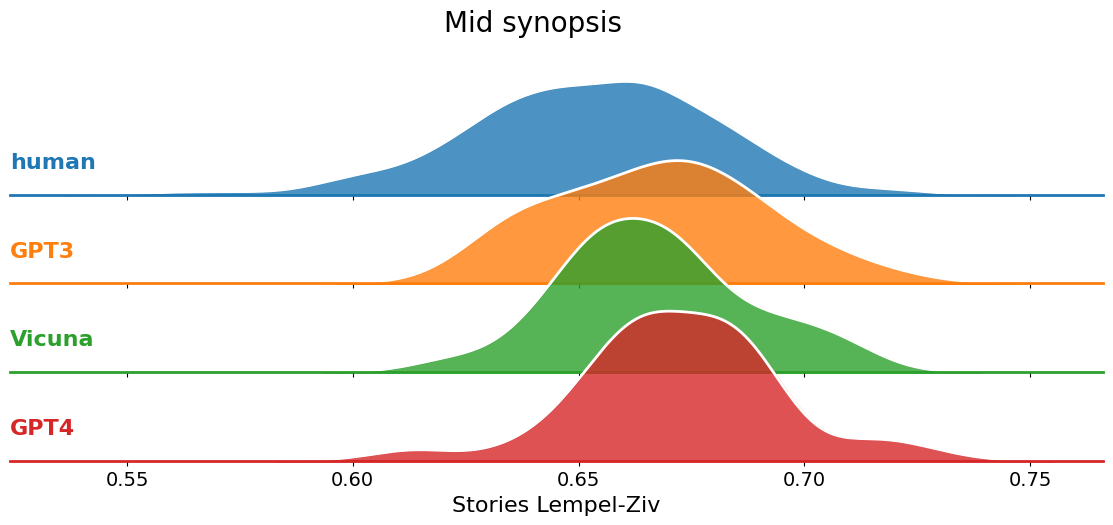

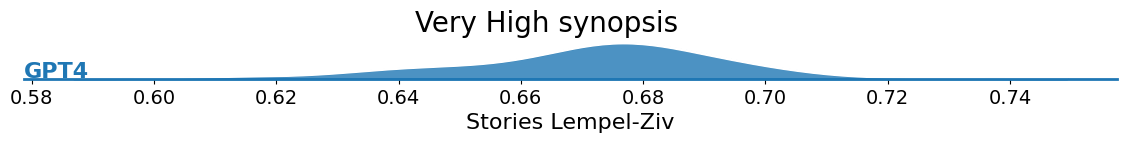

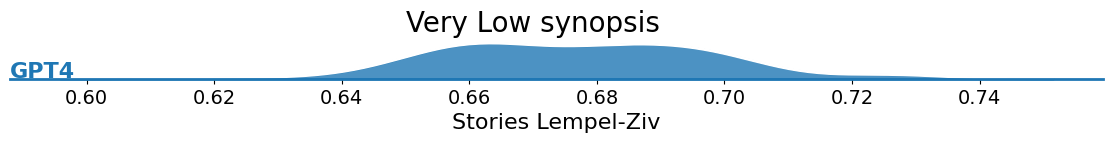

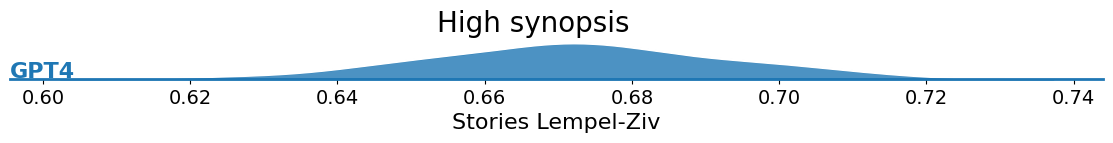

<Figure size 1170x0 with 0 Axes>

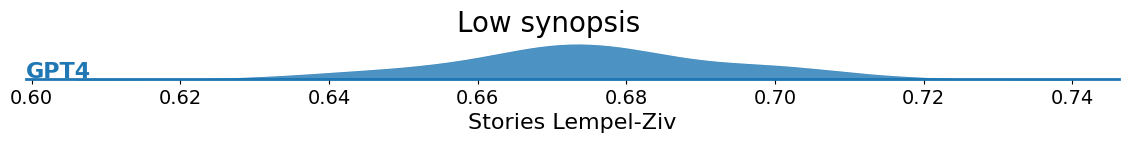

<Figure size 1170x0 with 0 Axes>

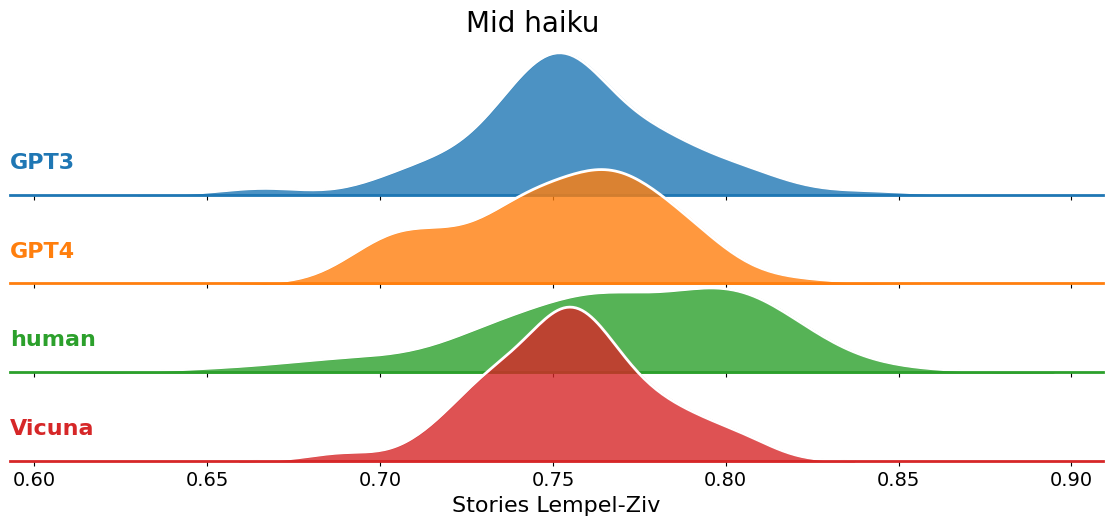

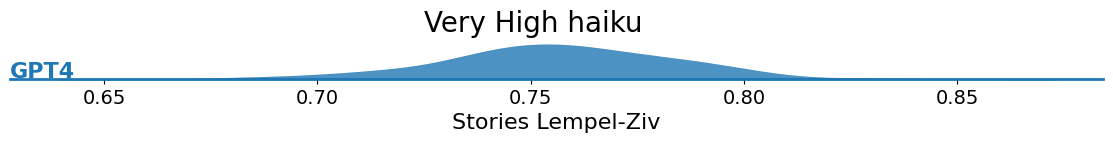

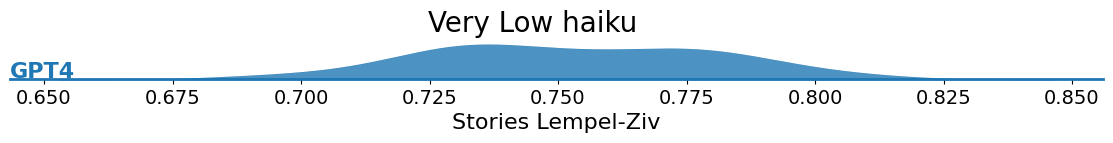

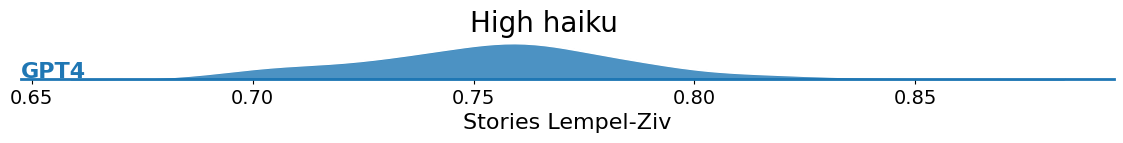

<Figure size 1170x0 with 0 Axes>

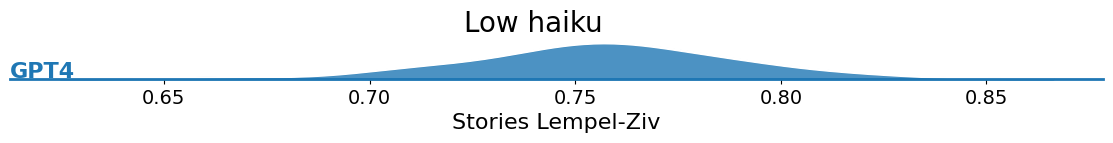

<Figure size 1170x0 with 0 Axes>

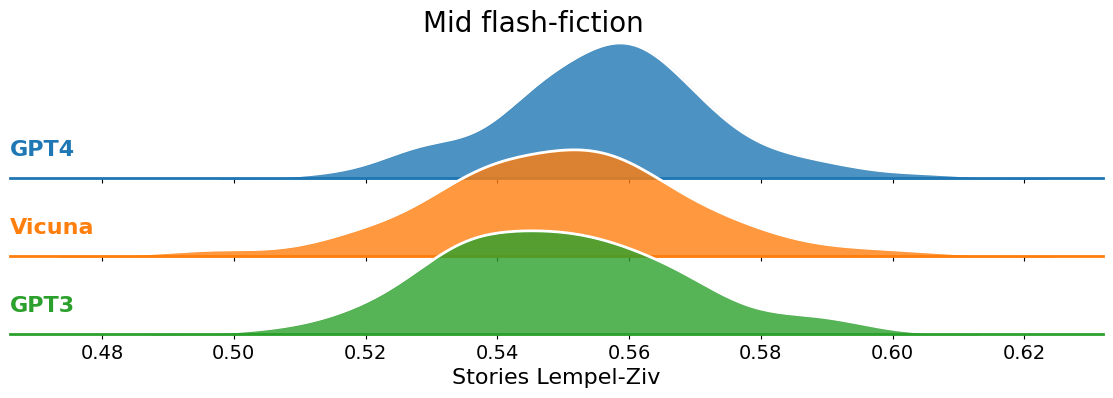

<Figure size 1170x0 with 0 Axes>

<Figure size 1170x0 with 0 Axes>

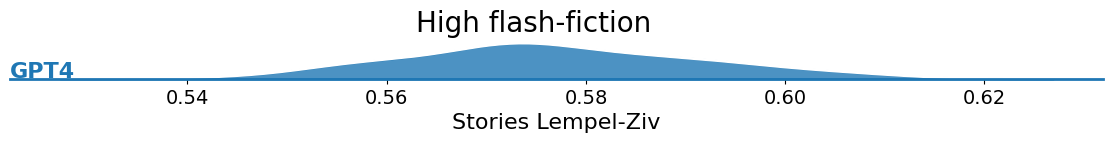

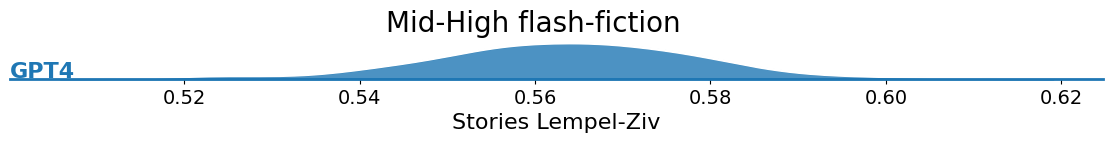

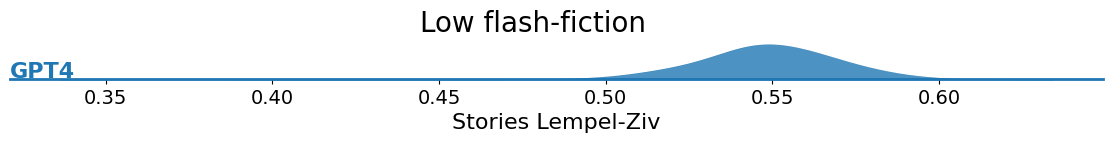

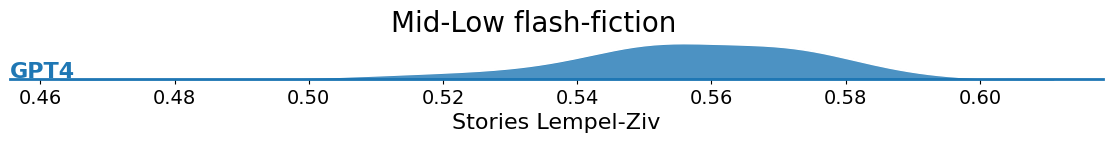

In [4]:
for condition in results_df['condition'].unique():
    for temp in results_df['temp'].unique(): 
        df = results_df[['model', 'condition', 'lziv']].loc[(results_df['condition']==condition) & (results_df['temp']==temp)]
        try:
            g = sns.FacetGrid(df, row="model", hue="model", aspect=9, height=1.3,)
            print("Works:", condition, temp)
        except ValueError:
            print(condition, temp)
            continue

        # make transparent background
        for ax in g.axes.flat:
            ax.set_facecolor('none')
        # Draw the densities in a few steps
        g.map(sns.kdeplot, "lziv",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=0.8, linewidth=1.5)
        g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
        # passing color=None to refline() uses the hue mapping
        g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
        # Define and use a simple function to label the plot in axes coordinates
        def label(x, color, label):
            ax = plt.gca()
            # check if Human is in the label
            ax.text(0, .2, label, fontweight="bold", color=color,
                    ha="left", va="center", transform=ax.transAxes,fontsize=16)
        g.map(label, "lziv")


        for ax in g.axes.flat:
            ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
            for label in ax.get_xticklabels():
                    label.set_fontsize(14)
        # Remove axes details that don't play well with overlap
        g.set_titles("")
        # Set the subplots to overlap
        g.figure.subplots_adjust(hspace=-.45)
        g.set(yticks=[], ylabel="")
        g.despine(bottom=True, left=True)
        g.fig.suptitle(f'{temp} {condition}', fontsize=20)
        #g.savefig(f'../figures/lziv_ridge_{temp}_{condition}.png', dpi=300, bbox_inches='tight')

### GPT-4

Text(0.5, 0.98, 'GPT4 Lempel-Ziv Temperatures for Flash Fiction')

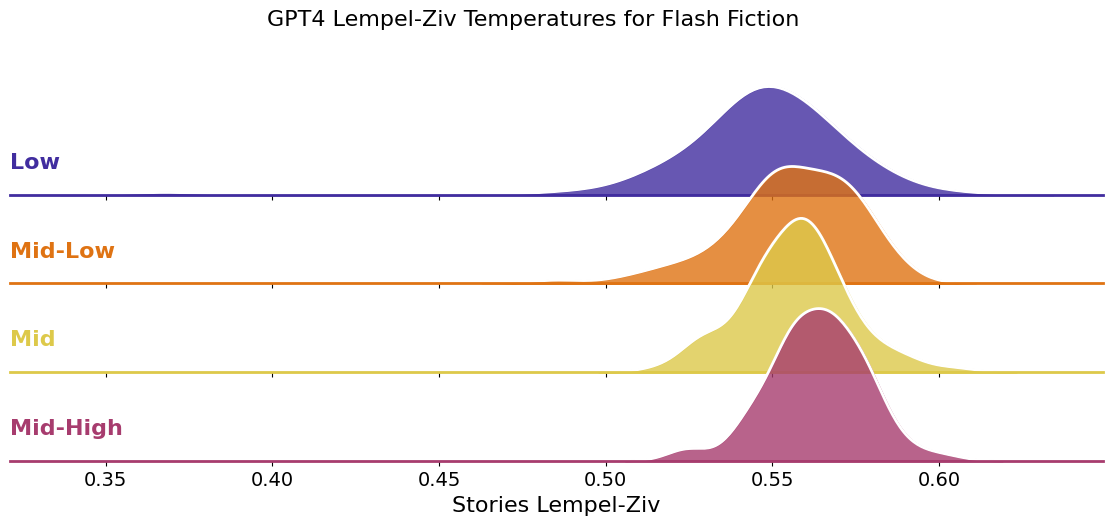

In [5]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='flash-fiction') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=4, desat=.9)
pal = [pal[0], pal[2], pal[3], pal[1]]
order = ['Low', 'Mid-Low', 'Mid', 'Mid-High']
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=1.3,palette=pal, row_order=order, hue_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "lziv")


for ax in g.axes.flat:
    ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Lempel-Ziv Temperatures for Flash Fiction', fontsize=16)
#g.savefig(f'../figures/GPT4_lziv_ridge_flashfiction_temp.png', dpi=300, bbox_inches='tight')

### GPT4

Text(0.5, 0.98, 'GPT4 Lempel-Ziv Temperatures for Haiku')

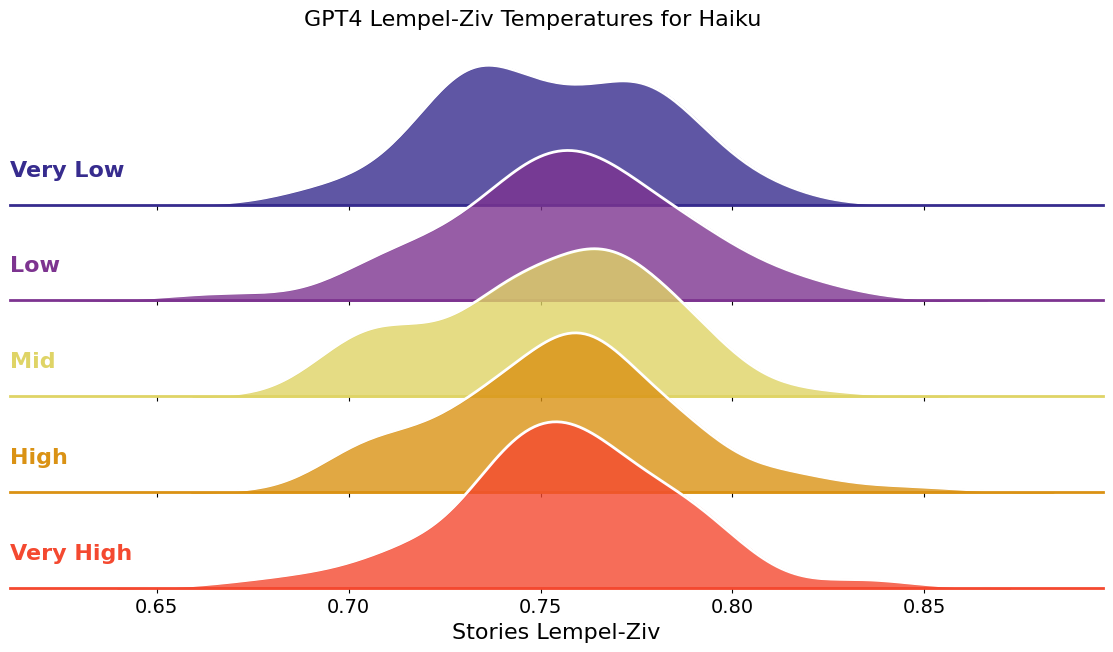

In [6]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='haiku') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
order = ["Very Low", "Low", "Mid", "High", "Very High"]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=1.3,palette=pal, hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "lziv")


for ax in g.axes.flat:
    ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Lempel-Ziv Temperatures for Haiku', fontsize=16)
#g.savefig(f'../figures/GPT4_lziv_ridge_haiku_temp.png', dpi=300, bbox_inches='tight')

## Plot temperatures for synopsis

### GPT-4

Text(0.5, 0.98, 'GPT4 Lempel-Ziv Temperatures for Synopsis')

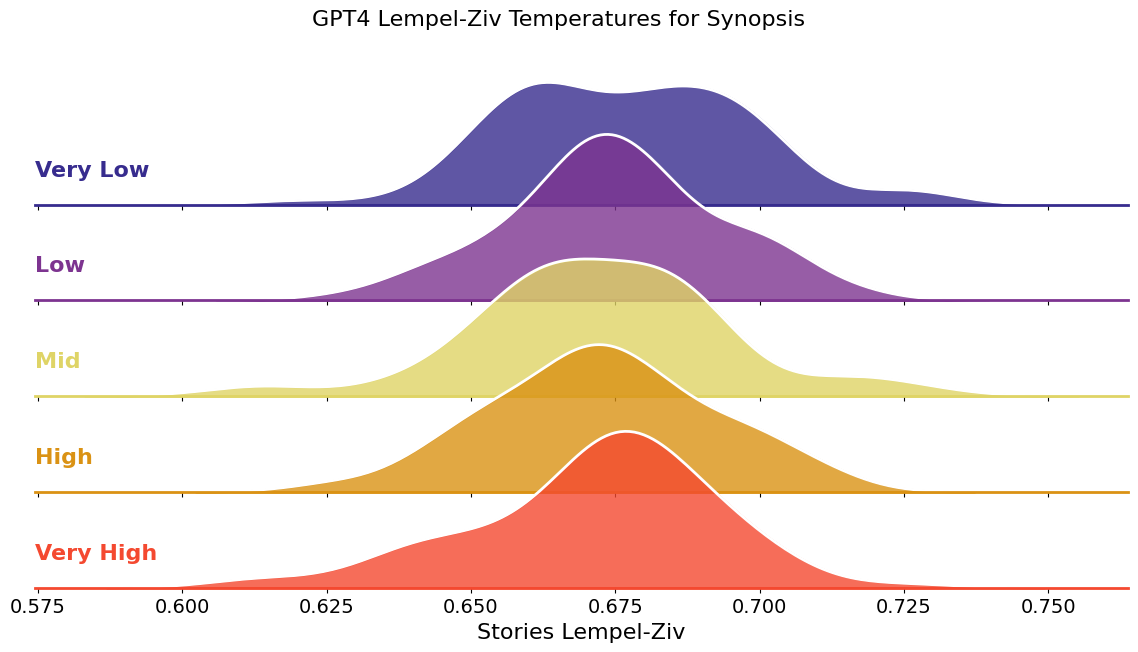

In [7]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='synopsis') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
order = ["Very Low", "Low", "Mid", "High", "Very High"]
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=1.3,palette=pal,hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "lziv")


for ax in g.axes.flat:
    ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Lempel-Ziv Temperatures for Synopsis', fontsize=16)
#g.savefig(f'../figures/GPT4_lziv_ridge_synopsis_temp.png', dpi=300, bbox_inches='tight')